# **Building and Training a Binary Classification Neural Network with Keras**

Goal =  
In this code, I'll create and train (with Adam optimizer) a neural network for a binary classification task with Keras & then evaluate its performance.


## Data Preparation

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-talk')

import datetime
import io, requests, zipfile

'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle


def grid(x1, x2, off_set = .1, n_points = 100):
    ## d s show the range in the two varible.
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()

    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid.
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y

import requests, io
url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )

# data = np.load( 'particle_mini.npz' )
X, Y = data['X'], data['Y']
# The labels are 1 or 2. So we need to turn them into 0 and  1.
Y =(Y>1.5).astype(int)

# Shuffle the dataset
X, Y=shuffle(X, Y, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Mean of X_train:", X_train.mean(axis=0))
print("Std of X_train:", X_train.std(axis=0))
#the result should be close to 0 (so it means they are scaled)

Mean of X_train: [ 2.14425423e-15 -3.79308582e-15]
Std of X_train: [1. 1.]


## Building & training the Model

In [41]:
from tensorflow import keras as ks
model = ks.Sequential() #an empty nn
model.add(ks.layers.Dense(64, activation=ks.activations.relu, input_dim=2))
model.add(ks.layers.Dense(32, activation=ks.activations.relu))
model.add(ks.layers.Dense(16, activation=ks.activations.relu))
model.add(ks.layers.Dense(1, activation=ks.activations.sigmoid))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compiling the model
model.compile(loss=ks.losses.binary_crossentropy, #binary classification
              optimizer=ks.optimizers.Adam(learning_rate=0.001), #Adam optimizer
              metrics=[ks.metrics.binary_accuracy])

#batch_size: model updates weights after each mini-batch of 64 samples (increasing it to 128 can lower the flactuations in the loss curve)
history=model.fit(X_train,Y_train,epochs=30,batch_size=64, validation_data=(X_test,Y_test), verbose=1)

Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - binary_accuracy: 0.7643 - loss: 0.5367 - val_binary_accuracy: 0.9853 - val_loss: 0.0783
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9875 - loss: 0.0614 - val_binary_accuracy: 0.9870 - val_loss: 0.0540
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9907 - loss: 0.0490 - val_binary_accuracy: 0.9899 - val_loss: 0.0467
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9888 - loss: 0.0475 - val_binary_accuracy: 0.9916 - val_loss: 0.0442
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9897 - loss: 0.0473 - val_binary_accuracy: 0.9895 - val_loss: 0.0441
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9908 - loss: 0.0471 - val_binary_accuracy: 0.9916 - val_loss: 0.0403
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9928 - loss: 0.0375 - val_binary_accuracy: 0.9916 - val_loss: 0.0384
Epoch 

## Loss Curve


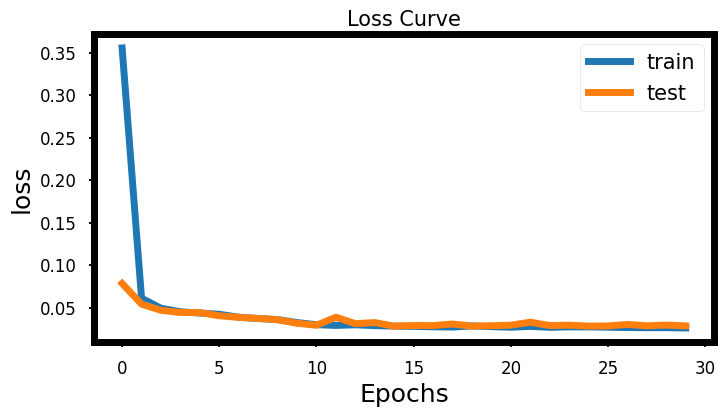

In [43]:
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="test")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## loss & accuracy

In [44]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.028432747349143028
accuracy: 0.9903401732444763


## Predictions

In [45]:
y_predict = (model.predict(X_test)>.5).astype(int)
print("Sample predictions:", y_predict[:10].flatten())


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Sample predictions: [0 0 0 1 1 1 1 0 1 0]
